# Modelado de series de tiempo con Prophet

Este notebook aplica el modelo Prophet de Facebook para predecir las exportaciones físicas de cobre chileno por tipo de producto. Además, se realiza una descomposición estacional de cada serie para entender mejor sus patrones.


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


import sys
import os
# Agregar el directorio src al PATH
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'src'))
from utils import analisis_estacional

plt.rcParams["figure.figsize"] = (12,6)

In [9]:
# Cargar datos limpios
df = pd.read_excel("../data/raw/02_07_2025__23_30_41.xls", skiprows=2)

df.rename(columns={
    'Periodo': 'Fecha',
    'Embarques Cobre Refinados (1)': 'Cobre_Refinado_TM',
    'Embarques Cobre Blíster (2)': 'Cobre_Blister_TM',
    'Embarques Cobre Graneles (3)': 'Cobre_Granel_TM',
    'Totales': 'Total_TM'
}, inplace=True)

month_translation = {
    'ene': 'Jan', 'feb': 'Feb', 'mar': 'Mar', 'abr': 'Apr', 'may': 'May', 'jun': 'Jun',
    'jul': 'Jul', 'ago': 'Aug', 'sep': 'Sep', 'oct': 'Oct', 'nov': 'Nov', 'dic': 'Dec'
}

# Convertir meses y luego a datetime
df['Fecha'] = df['Fecha'].str.lower().replace(month_translation, regex=True)
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%b-%Y')

df = df[['Fecha', 'Total_TM', 'Cobre_Refinado_TM', 'Cobre_Blister_TM', 'Cobre_Granel_TM']]
df.head()

,Fecha,Total_TM,Cobre_Refinado_TM,Cobre_Blister_TM,Cobre_Granel_TM
0,2003-01-01,470.299988,282.500000,18.900000,168.899994
1,2003-02-01,375.299988,187.000000,13.400000,174.899994
2,2003-03-01,342.700012,183.600006,8.500000,150.600006
3,2003-04-01,392.500000,230.300003,32.200001,130.000000
4,2003-05-01,374.199982,245.899994,20.799999,107.500000


## Descomposición estacional (con Statsmodels)

La descomposición estacional nos permite entender cómo se compone la serie: tendencia, estacionalidad y ruido.

Vamos a aplicar `seasonal_decompose` a cada serie por separado, usando una frecuencia mensual.


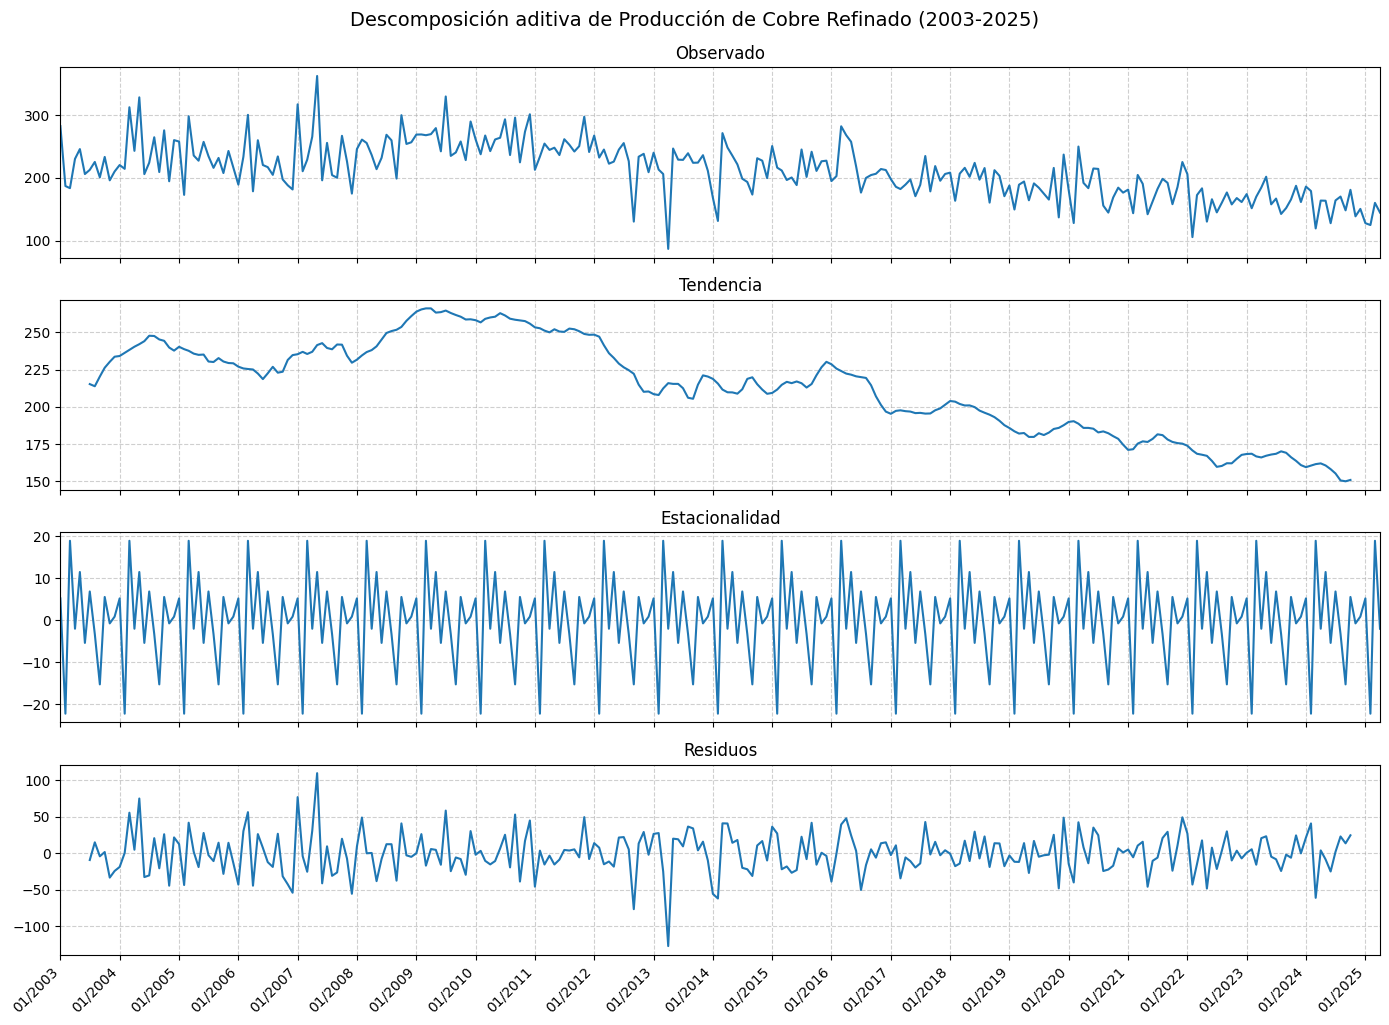

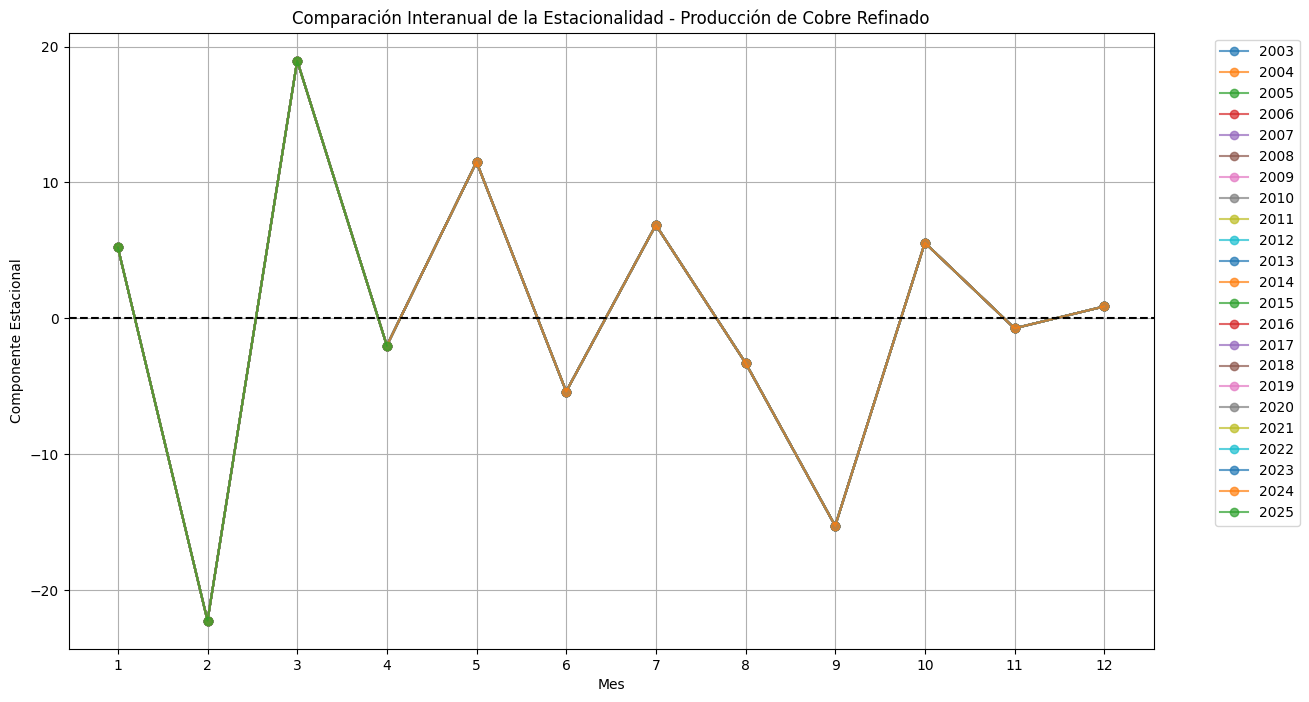

In [10]:
analisis_estacional(df, 'Cobre_Refinado_TM', 'Producción de Cobre Refinado')

### Análisis de la Producción de Cobre Refinado

#### 1. Tendencia
El análisis de tendencia revela un comportamiento decreciente en la producción de cobre refinado, particularmente notable a partir de 2012. Esta reducción progresiva podría asociarse a:

- Cambios en los precios internacionales del cobre
- Agotamiento de yacimientos de mayor ley
- Factores regulatorios o económicos del periodo

#### 2. Estacionalidad
El componente estacional presenta patrones consistentes interanualmente, destacando:

**Meses de máxima producción:**
- Marzo (posible efecto de reactivación post-vacaciones de verano)
- Mayo (preparación para mitad de año)
- Julio (segundo semestre operativo)

**Meses de mínima producción:**
- Febrero (efecto temporada vacacional)
- Junio (cierre de semestre)
- Septiembre (efecto Fiestas Patrias en Chile)

Este patrón recurrente sugiere que los factores operacionales y logísticos mantienen una influencia constante año tras año.

#### 3. Residuos
El análisis de residuos identifica dos eventos atípicos significativos:

1. **Outlier positivo (2007):**
   - Coincide con el súper ciclo del cobre (2003-2008)
   - Posible correlación con inversiones en capacidad productiva

2. **Outlier negativo (2013):**
   - Corresponde con el punto de inflexión en la tendencia
   - Relacionable con:
     - Caída sostenida en precios del commodity
     - Reformas tributarias en países productores
     - Cambios en la demanda china

Estos eventos residuales representan variaciones no explicadas por los componentes estacionales o tendenciales, requiriendo análisis específicos de coyuntura.

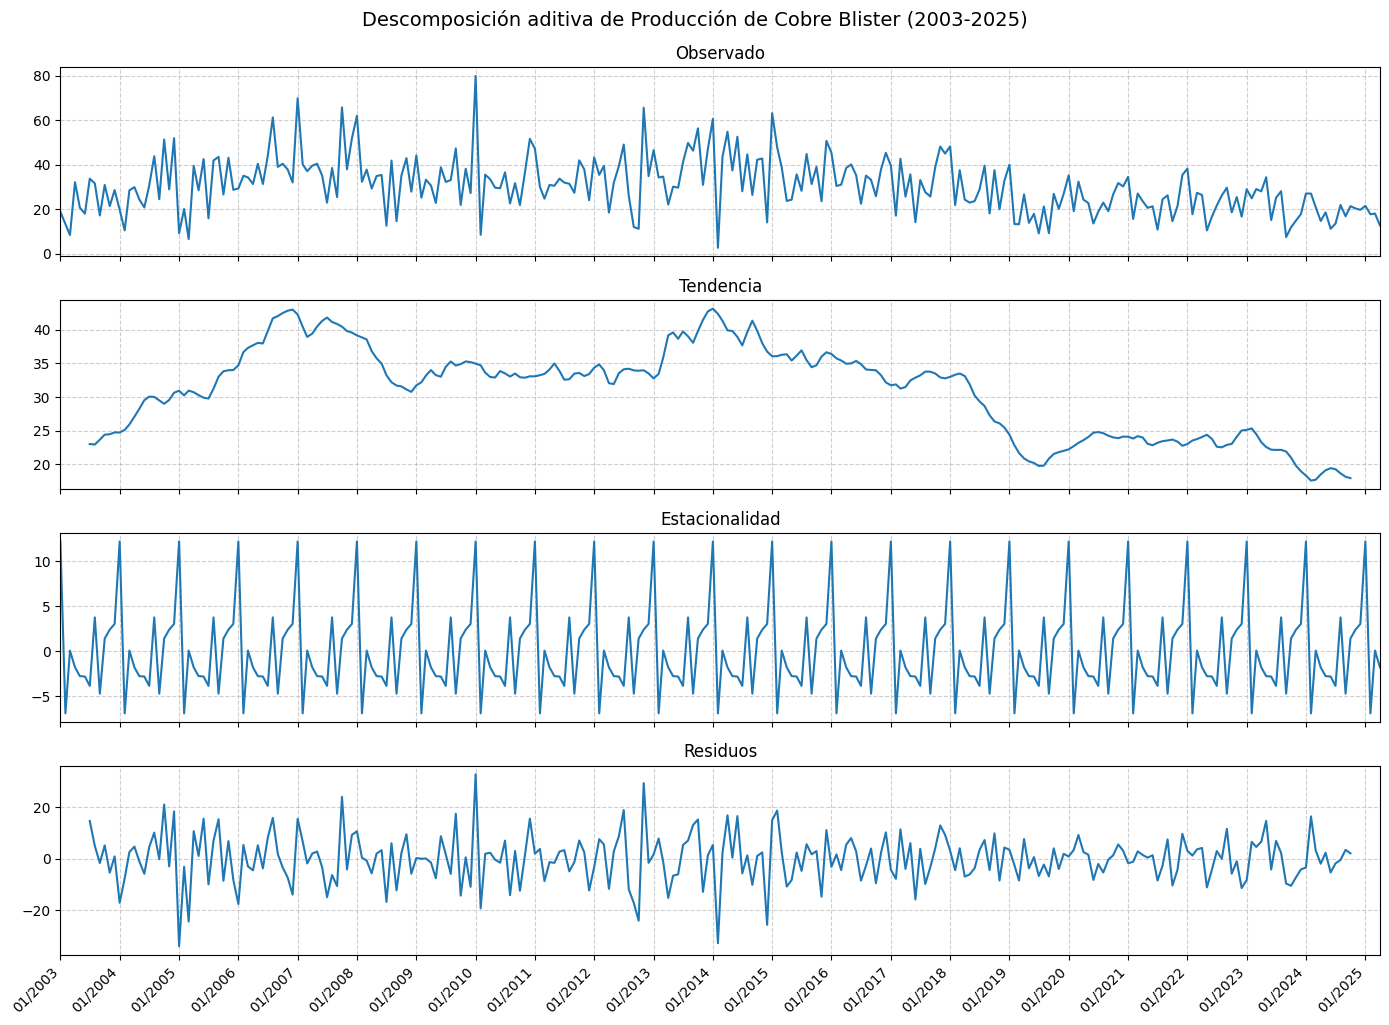

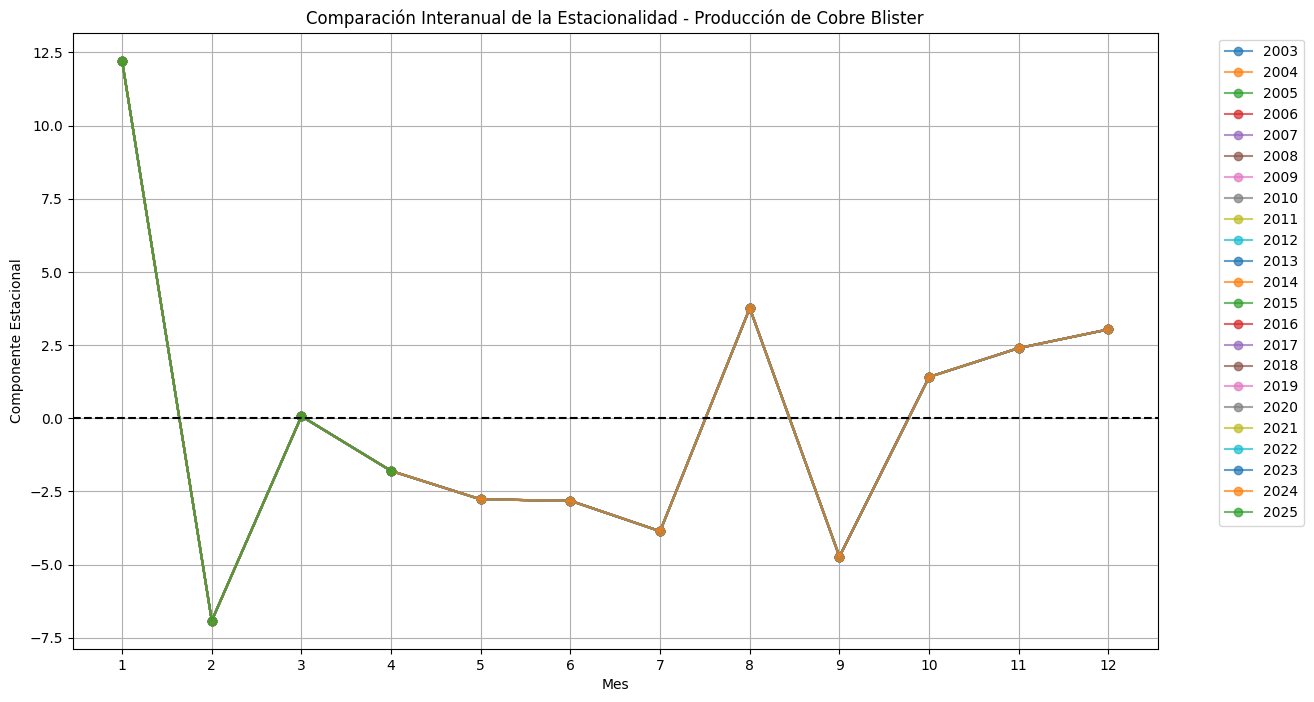

In [11]:
analisis_estacional(df, 'Cobre_Blister_TM', 'Producción de Cobre Blister')

### Análisis de la Producción de Cobre Blister

#### 1. Tendencia
El análisis de la serie temporal revela:

- **Reducción progresiva** en la producción a partir de 2014
- **Posibles factores explicativos**:
  - Cambios en los procesos de fundición
  - Sustitución tecnológica hacia métodos más eficientes
  - Disminución en la disponibilidad de concentrados para procesamiento

#### 2. Estacionalidad
El componente estacional muestra patrones consistentes interanuales:

**Meses de máxima producción:**
- **Enero**: Posible efecto de acumulación de inventarios año anterior
- **Agosto**: Preparación para aumento de demanda en segundo semestre

**Meses de mínima producción:**
- **Febrero**: Impacto por temporada vacacional
- **Septiembre**: Efecto de paradas técnicas programadas

Este comportamiento recurrente sugiere que los factores operacionales mantienen un patrón estable en el mediano plazo.

#### 3. Residuos (Anomalías)
Se identifican eventos atípicos significativos:

**Outliers positivos** (años de producción excepcional):
1. 2010 (mayor magnitud) - Recuperación post-crisis financiera
2. 2013 - Optimización de procesos metalúrgicos
3. 2008 - Boom de precios del cobre

**Outliers negativos** (años de caída productiva):
1. 2014-2015 (período crítico) - Coincide con:
   - Reformas ambientales en fundiciones
   - Caída sostenida de precios internacionales
2. 2005 - Problemas en suministro de concentrados

#### Interpretación Integral
La combinación de:
- Tendencia decreciente post-2014
- Estacionalidad marcada
- Eventos atípicos concentrados en períodos de volatilidad de precios

Sugiere que la producción de cobre blister responde fuertemente a:
✓ Factores tecnológicos
✓ Coyuntura de precios
✓ Regulaciones ambientales

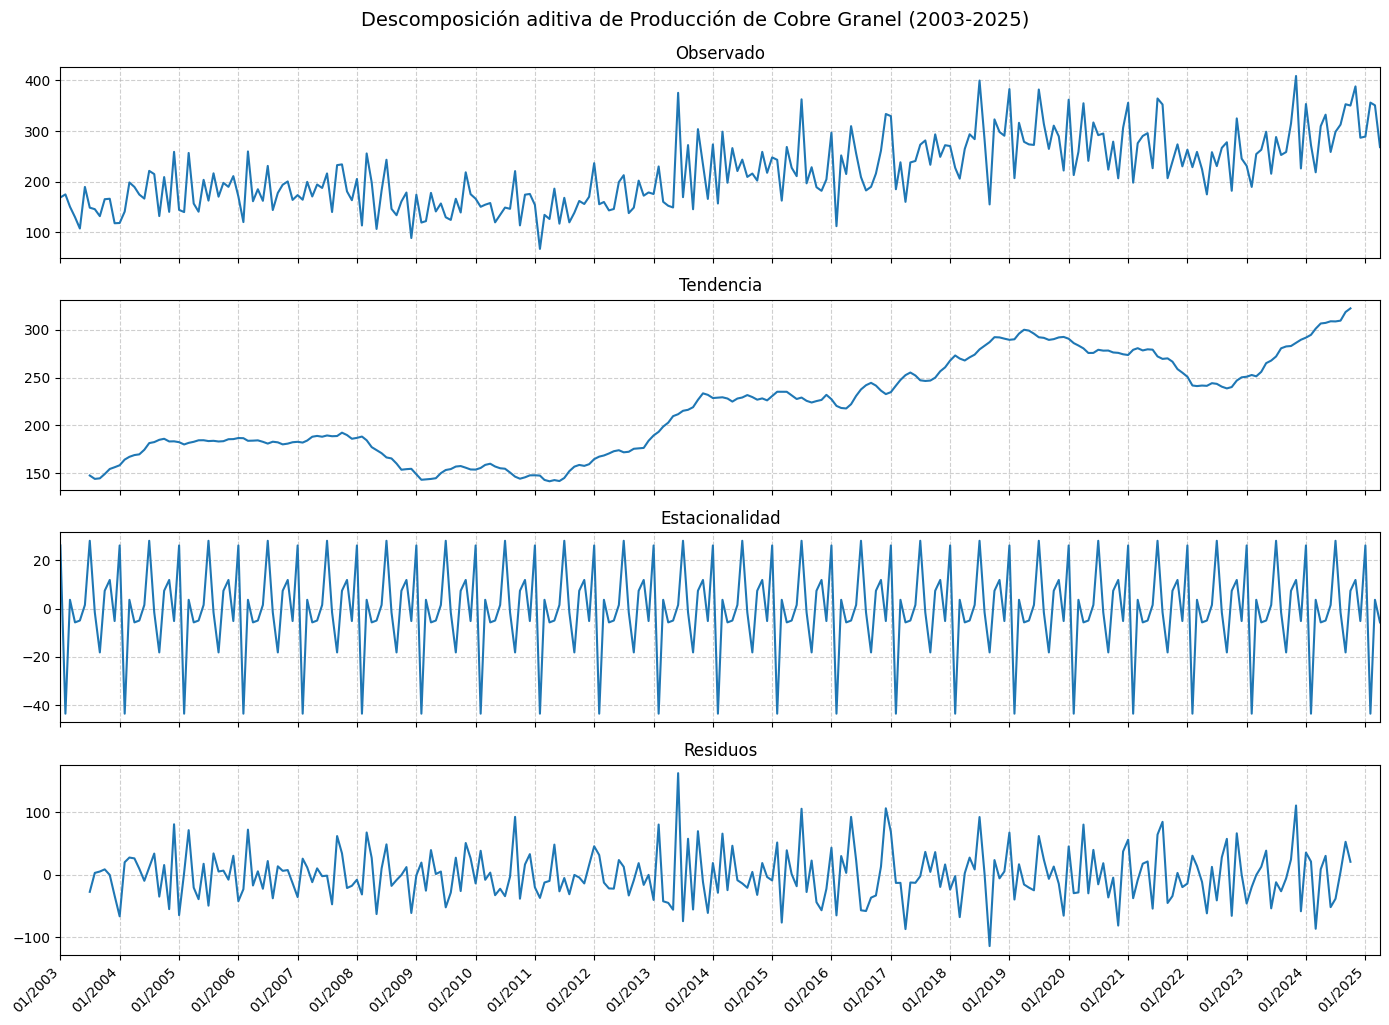

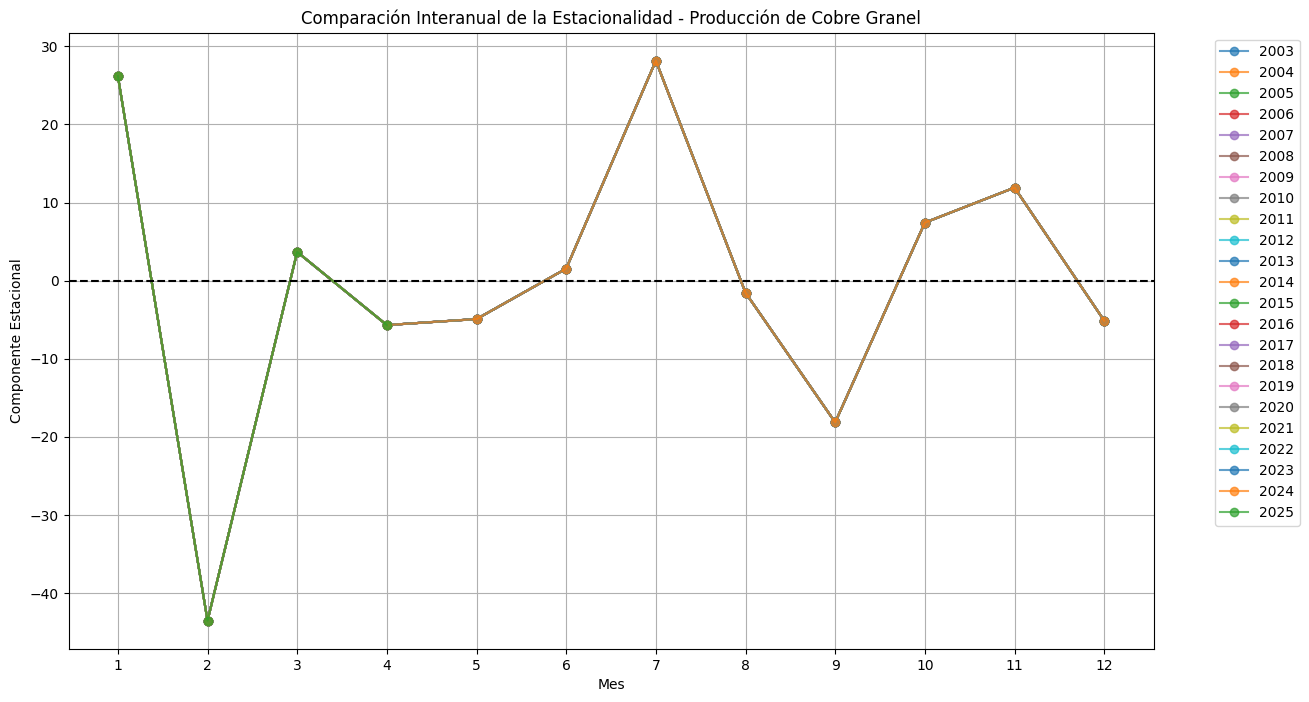

In [12]:
analisis_estacional(df, 'Cobre_Granel_TM', 'Producción de Cobre Granel')

### Análisis de la Producción de Cobre a Granel

#### 1. Tendencia
El análisis de la serie temporal muestra:

- **Crecimiento sostenido** desde 2013
- **Posibles impulsores**:
  - Mayor demanda internacional de cobre a granel
  - Optimización de procesos logísticos de exportación
  - Expansión de capacidad en puertos especializados
  - Cambios en preferencias del mercado por este formato

#### 2. Estacionalidad
Patrón estacional consistente interanual:

**Meses pico de producción:**
- **Enero**: Acumulación post-cierre anual y preparación para nuevo ciclo
- **Julio**: Ajustes de inventario para segundo semestre

**Meses de menor producción:**
- **Febrero**: Efecto temporada vacacional
- **Septiembre**: Impacto por celebraciones patrias en países productores

#### 3. Residuos (Eventos Atípicos)
Anomalías significativas detectadas:

**Outliers positivos** (años de sobreproducción):
1. **2013**: Punto de inicio del crecimiento sostenido
2. **2015**: Posible correlación con tratados comerciales
3. **2017**: Optimización de cadenas logísticas
4. **2024**: Recuperación post-pandemia acelerada

**Outlier negativo** (año de caída abrupta):
- **2018**: 
  - Conflictos laborales en principales mineras
  - Cambios regulatorios en exportaciones
  - Eventos climáticos extremos

#### Interpretación Integral
La combinación de:
✓ Tendencia alcista constante
✓ Estacionalidad predecible
✓ Eventos atípicos asociables a coyunturas específicas

Indica que este formato de comercialización:
- Ha ganado participación de mercado
- Responde a dinámicas logísticas mejoradas
- Mantiene vulnerabilidad a eventos disruptivos

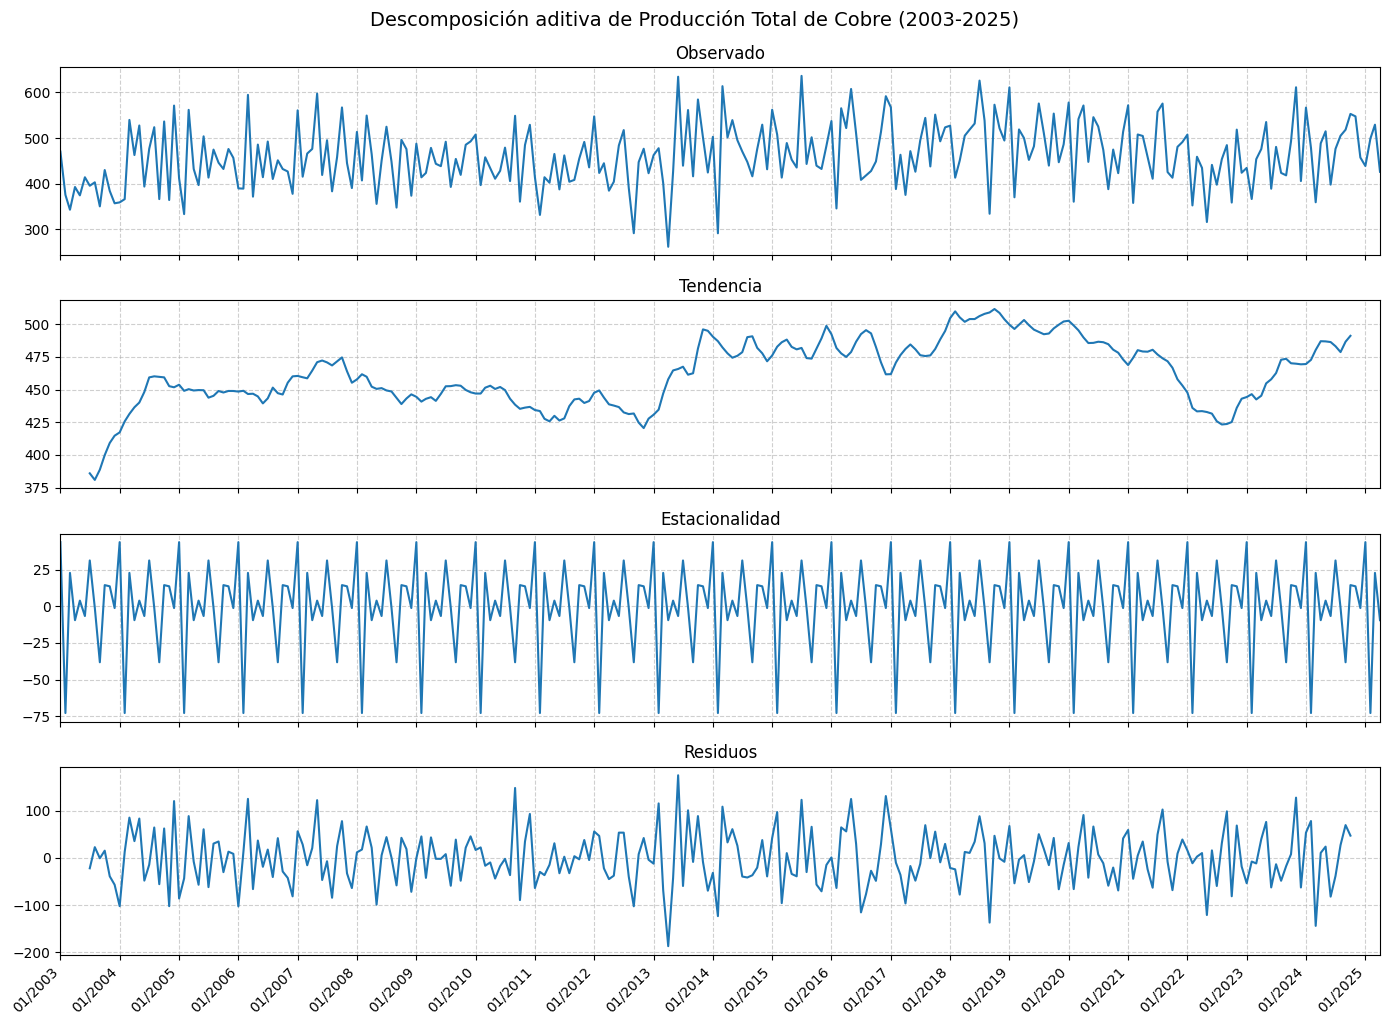

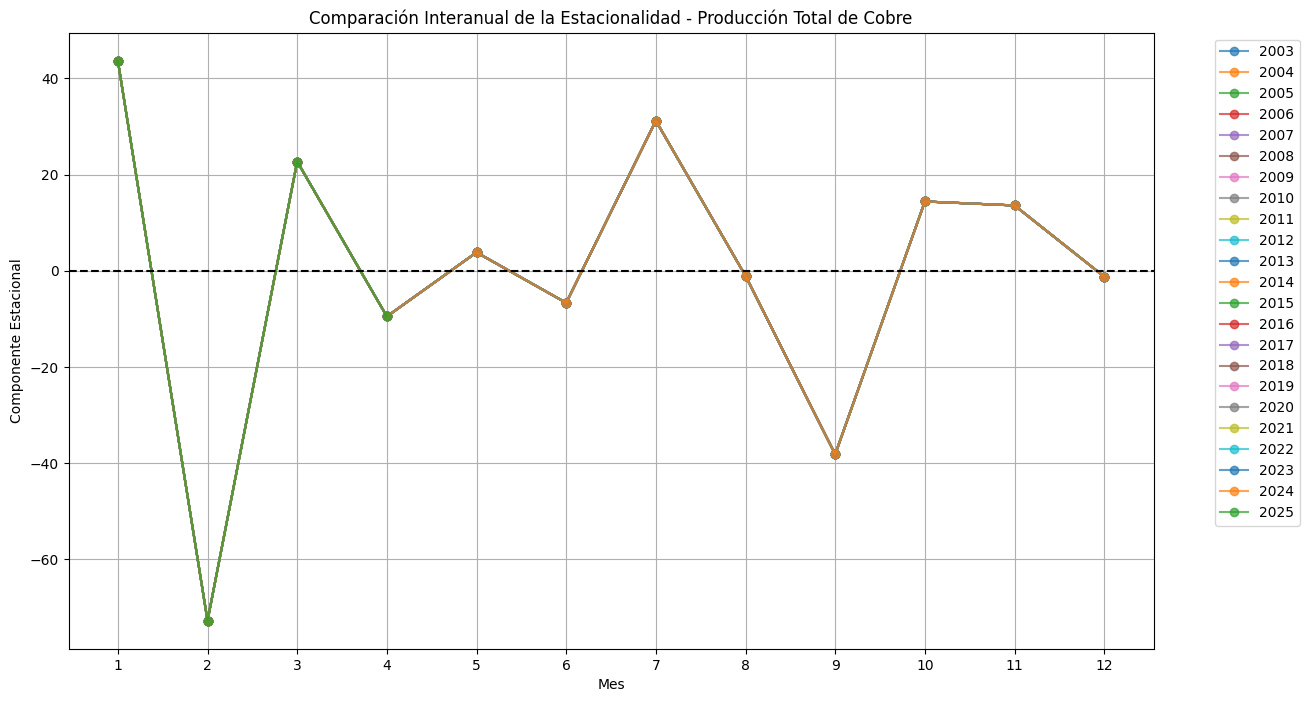

In [13]:
analisis_estacional(df,'Total_TM', 'Producción Total de Cobre')

### Análisis de la Producción Total de Cobre

#### 1. Tendencia
El análisis revela un comportamiento general con características particulares:

- **Crecimiento sostenido** desde 2013 con dos interrupciones significativas:
  - **2022-2023**: Caída temporal atribuible a:
    - Impacto post-pandemia en cadenas de suministro
    - Ajustes en la demanda global
    - Restricciones energéticas en principales países productores
  - **Recuperación** en 2024, retomando la tendencia alcista

#### 2. Estacionalidad
Patrón estacional consistente:

**Meses de máxima producción:**
- **Enero** (acumulación estratégica post-cierre anual)
- **Marzo** (reactivación post-período vacacional)
- **Julio** (preparación para demanda del segundo semestre)

**Meses de mínima producción:**
- **Febrero** (efecto temporada alta vacacional)
- **Septiembre** (impacto de mantenimientos programados)

#### 3. Residuos (Eventos Atípicos)

**Outliers positivos notables:**
1. Mediados **2013** (inicio del ciclo alcista)
2. **2010** (recuperación post-crisis financiera global)
3. Fin **2023** (reactivación acelerada post-crisis)
4. **2006** (auge inicial del superciclo del cobre)

**Outliers negativos relevantes:**
1. Inicio **2013** (ajuste inicial del nuevo ciclo productivo)
2. Principio **2024** (impacto por retrasos en reinicio operacional)
3. Mediados **2018** (tensiones comerciales globales)

#### Interpretación Integral
La producción total muestra:
✓ Resiliencia ante shocks temporales (recuperación post 2022-2023)
✓ Patrón estacional bien establecido
✓ Sensibilidad a ciclos económicos globales

Factores clave:
- Capacidad de adaptación a crisis temporales
- Dependencia de factores estacionales operacionales
- Vulnerabilidad a fluctuaciones de demanda internacional

## Preparación de los conjutos de datos

Prophet requiere que cada serie tenga el formato:
- `ds`: fechas
- `y`: variable a modelar

Vamos a crear un DataFrame para cada serie con este formato.

In [14]:
series_names = ['Total_TM', 'Cobre_Refinado_TM', 'Cobre_Blister_TM', 'Cobre_Granel_TM']
prophet_data = {}

for name in series_names:
    temp_df = df[['Fecha', name]].rename(columns={'Fecha': 'ds', name: 'y'})
    temp_df.to_csv(f"../data/processed/{name}.csv", index=False)
    prophet_data[name] = temp_df

## 🧾 Conclusiones del análisis exploratorio y preparación

A partir del análisis de las exportaciones físicas de cobre por tipo de producto, se concluye lo siguiente:

### 🔍 Comportamiento por tipo de producto

- **Cobre Refinado**: Muestra una tendencia decreciente desde 2012, acompañada de una estacionalidad bien definida. Esta evolución puede reflejar cambios estructurales en la industria o decisiones de política productiva.
- **Cobre Blíster**: Se observa una caída post-2014, con estacionalidad moderada. Las fluctuaciones podrían deberse a paradas técnicas, ciclos de mantenimiento o regulaciones ambientales.
- **Cobre a Granel**: Es la serie con mayor crecimiento sostenido, y presenta una estacionalidad marcada. Esto sugiere una consolidación de este formato de exportación en el mercado internacional.
- **Producción Total**: Resume el comportamiento agregado de las demás series, mostrando resiliencia en contextos adversos (por ejemplo, la pandemia), y un patrón estacional regular.

### 🔧 Datos preparados para modelado

- Las cuatro series fueron convertidas al formato estándar de predicción (`ds`, `y`) y almacenadas en la carpeta `data/processed/`.
- Se aplicó descomposición estacional para identificar tendencias y ciclos relevantes, que serán útiles en la selección y ajuste de modelos.

### ✅ Próximos pasos

En los siguientes notebooks se implementarán y compararán **diversos modelos de predicción de series de tiempo**, incluyendo:

- **Prophet**, por su capacidad de capturar tendencias y estacionalidades automáticamente.
- **ARIMA/SARIMA**, como enfoques estadísticos clásicos robustos y explicables.
- (Opcionalmente) **modelos más complejos**, como XGBoost o LSTM, si la estructura y volumen de datos lo permiten.

Cada modelo será evaluado en términos de su capacidad predictiva, interpretabilidad y ajuste a los datos históricos. Esto permitirá seleccionar la mejor estrategia para predecir las exportaciones de cobre por tipo de producto.

---
